In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


In [30]:

nqs = [30,40,50,60,75,100]
backend_name = "ibm_brisbane"
results_brisbane = {nq:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for nq in nqs}
backend_name = "ibm_torino"
results_torino = {nq:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for nq in nqs}

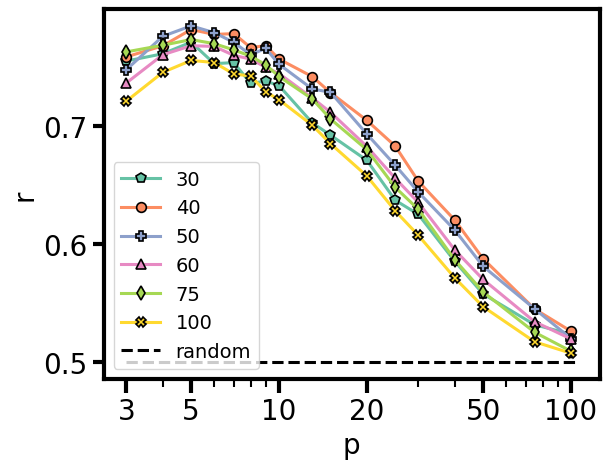

In [356]:
delta = 1
colors = plt.get_cmap("Set2")
fig, ax = plt.subplots()
markers = {30:"p", 40:"o", 50:"P", 60:"^", 75:"d", 100:"X"}
for nn, nq in enumerate(results_brisbane.keys()):
    res_nq = results_brisbane[nq]["postprocessing"]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = f"{nq}", marker=markers[nq], markeredgecolor="black", color=colors(nn), markersize=7)
ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")

ax.legend()
ax.set_xscale("log")
ps = [3,5,10,20,50,100]
ax.set_xticks(ps)
ax.set_xticklabels(ps)
fig.savefig("./Figures/1D/Brisbane_30_100.pdf", bbox_inches="tight", transparent=True)

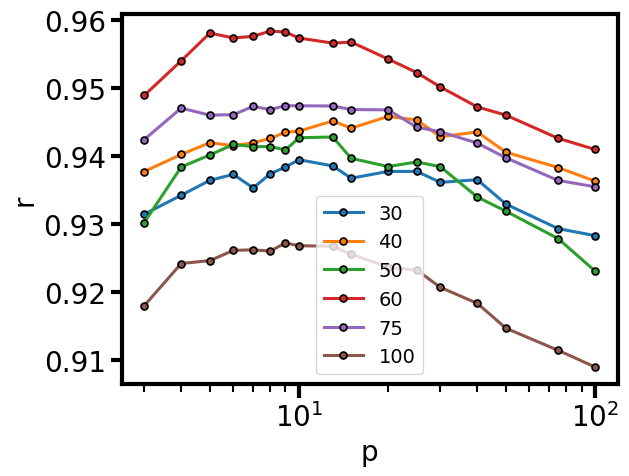

In [50]:
delta = 1
fig, ax = plt.subplots()
for nq in results_torino.keys():
    res_nq = results_torino[nq]["postprocessing_mitig"]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = f"{nq}", marker="o", markeredgecolor="black")
# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")

ax.legend()
ax.set_xscale("log")

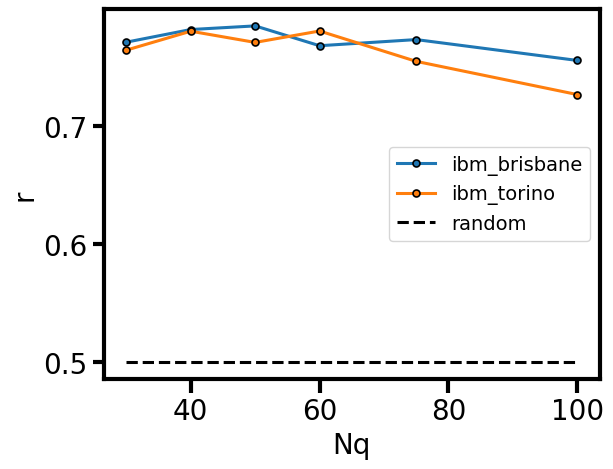

In [86]:
delta = 1
fig, ax = plt.subplots()

for name, results_backend in {"ibm_brisbane":results_brisbane, "ibm_torino":results_torino}.items():
    rs = []
    nqs = list(results_backend.keys())

    for nq in nqs:
        res_nq = results_backend[nq]["postprocessing"]
        ps = [5]
        secs = list(res_nq[delta][ps[0]].keys())
        ri = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
        best_sec = np.argmax(ri.max(axis=1))
        rs.append(ri[best_sec])
    ax.plot(nqs, rs, label = name, marker="o", markeredgecolor="black")
ax.plot(nqs, len(nqs)*[0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("Nq")

ax.legend()
# ax.set_xscale("log")

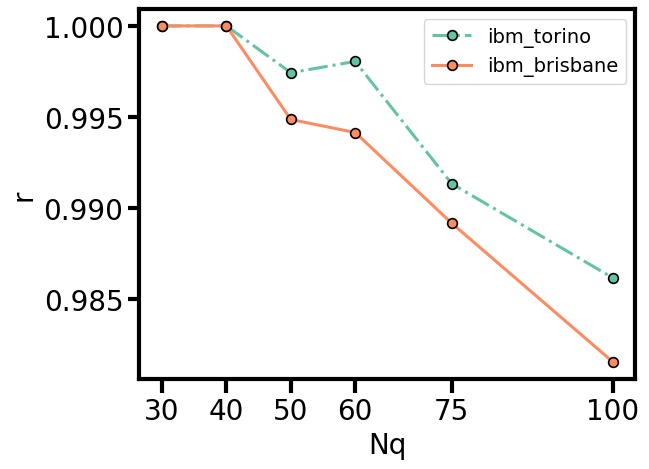

In [108]:
delta = 1
fig, ax = plt.subplots()
colors = plt.get_cmap("Set2")
nn = 0
for name, results_backend in {"ibm_torino":results_torino, "ibm_brisbane":results_brisbane}.items():
    rs = []
    nqs = list(results_backend.keys())

    for nq in nqs:
        res_nq = results_backend[nq]["postprocessing_mitig"]
        ps = list(res_nq[delta].keys())
        secs = list(res_nq[delta][ps[0]].keys())
        ri = np.array([[max(res_nq[delta][p][sec]["results"][:,1]) for p in ps] for sec in secs])
        best_sec = np.argmax(ri.max(axis=1))
        rs.append(max(ri[best_sec]))
    ax.plot(nqs, rs, label = name, marker="o", markeredgecolor="black", color=colors(nn), markersize=7, linestyle= "-." if name == "ibm_torino" else "-")
    nn += 1
# ax.plot(nqs, len(nqs)*[0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("Nq")

ax.legend()
ax.set_xticks([30,40,50,60,75,100])
fig.savefig("./Figures/1D/max_r_mitig_1D.pdf", transparent=True, bbox_inches="tight")
# ax.set_xscale("log")


ibm_marrakesh 0.7725692307692306 8
ibm_fez 0.776613846153846 9
ibm_torino 0.7282861538461537 9
ibm_brisbane 0.7560153846153844 5
ibm_sherbrooke 0.7209246153846152 5
ibm_kyiv 0.7232769230769228 4
ibm_nazca 0.6727430769230768 5
ibm_kyoto 0.6615830769230767 4
ibm_osaka 0.6745399999999998 8
ibm_brussels 0.7191769230769229 5
ibm_strasbourg 0.7109923076923075 5


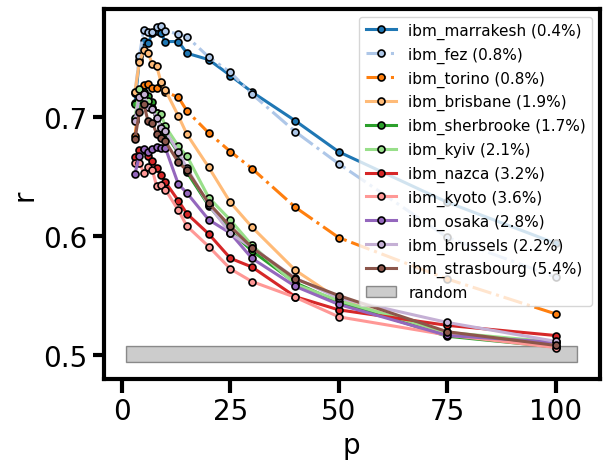

In [5]:
names = ["ibm_marrakesh", "ibm_fez","ibm_torino", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}

fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
colors = plt.get_cmap("tab20")
EPLG = {"ibm_marrakesh":" (0.4%)","ibm_torino":" (0.8%)", "ibm_brisbane":" (1.9%)", "ibm_sherbrooke":" (1.7%)", "ibm_kyiv":" (2.1%)", "ibm_osaka":" (2.8%)",
         "ibm_nazca":" (3.2%)", "ibm_kyoto":" (3.6%)", "ibm_kyiv":" (2.1%)", "ibm_fez":" (0.8%)", "ibm_brussels":" (2.2%)", "ibm_strasbourg":" (5.4%)"}
for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    print(backend_name, max(rs), ps[np.argmax(rs)])
    ax.plot(ps, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")

rand_data = res_random["results"][:,1]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([0,100], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.legend(fontsize=11)
ax.set_ylabel("r")
ax.set_xlabel("p")
# ax.set_xscale("log")
fig.savefig(f"./Figures/1D/comparison_100q_{case}.pdf", bbox_inches="tight", transparent=True)


In [22]:
qubits_line = list(range(13,-1,-1)) + [14] + list(range(18,33)) + [36] + list(range(51,36,-1)) + [52] + list(range(56,71)) + [74] + list(range(89,74,-1)) + [90] + list(range(94,109)) + [112] + list(range(126,112,-1))

qubits_line = qubits_line
layer_1 = []
layer_2 = []

for n, i in enumerate(range(0,len(qubits_line)-1,2)):
    layer_1.append([qubits_line[i], qubits_line[i+1]])
for n, i in enumerate(range(1,len(qubits_line)-1,2)):
    layer_2.append([qubits_line[i], qubits_line[i+1]])

In [34]:
problems = np.load("./Data/problems_v1.npy", allow_pickle=True).item()

In [20]:
layout_pos = { 0:(0,0), 1:(0,1), 2:(0,2), 3:(0,3), 4:(0,4), 5:(0,5), 6:(0,6), 7:(0,7), 8:(0,8), 9:(0,9), 10:(0,10), 11:(0,11), 12:(0,12), 13:(0,13),
14:(1,0), 15:(1,4), 16:(1,8), 17:(1,12),
18:(2,0), 19:(2,1), 20:(2,2), 21:(2,3), 22:(2,4), 23:(2,5), 24:(2,6), 25:(2,7), 26:(2,8), 27:(2,9), 28:(2,10), 29:(2,11), 30:(2,12), 31:(2,13), 32:(2,14),
33:(3,2), 34:(3,6), 35:(3,10), 36:(3,14),
37:(4,0), 38:(4,1), 39:(4,2), 40:(4,3), 41:(4,4), 42:(4,5), 43:(4,6), 44:(4,7), 45:(4,8), 46:(4,9), 47:(4,10), 48:(4,11), 49:(4,12), 50:(4,13), 51:(4,14),
52:(5,0), 53:(5,4), 54:(5,8), 55:(5,12),
56:(6,0), 57:(6,1), 58:(6,2), 59:(6,3), 60:(6,4), 61:(6,5), 62:(6,6), 63:(6,7), 64:(6,8), 65:(6,9), 66:(6,10), 67:(6,11), 68:(6,12), 69:(6,13), 70:(6,14),
71:(7,2), 72:(7,6), 73:(7,10), 74 :(7,14),
75:(8,0), 76:(8,1), 77:(8,2), 78:(8,3), 79:(8,4), 80:(8,5), 81:(8,6), 82:(8,7), 83:(8,8), 84:(8,9), 85:(8,10), 86:(8,11), 87:(8,12), 88:(8,13), 89:(8,14),
90:(9,0), 91:(9,4), 92:(9,8), 93:(9,12),
94:(10,0), 95:(10,1), 96:(10,2), 97:(10,3), 98:(10,4), 99:(10,5), 100:(10,6), 101:(10,7), 102:(10,8), 103:(10,9), 104:(10,10), 105:(10,11), 106:(10,12), 107:(10,13), 108:(10,14),
109:(11,2), 110:(11,6), 111:(11,10), 112:(11,14),
113:(12,1), 114:(12,2), 115:(12,3), 116:(12,4), 117:(12,5), 118:(12,6), 119:(12,7), 120:(12,8), 121:(12,9), 122:(12,10), 123:(12,11), 124:(12,12), 125:(12,13), 126:(12,14),
}

layout_pos_heron = { 0:(0,0), 1:(0,1), 2:(0,2), 3:(0,3), 4:(0,4), 5:(0,5), 6:(0,6), 7:(0,7), 8:(0,8), 9:(0,9), 10:(0,10), 11:(0,11), 12:(0,12), 13:(0,13), 14:(0,14),
15:(1,0), 16:(1,4), 17:(1,8), 18:(1,12),
19:(2,0), 20:(2,1), 21:(2,2), 22:(2,3), 23:(2,4), 24:(2,5), 25:(2,6), 26:(2,7), 27:(2,8), 28:(2,9), 29:(2,10), 30:(2,11), 31:(2,12), 32:(2,13), 33:(2,14),
34:(3,2), 35:(3,6), 36:(3,10), 37:(3,14),
38:(4,0), 39:(4,1), 40:(4,2), 41:(4,3), 42:(4,4), 43:(4,5), 44:(4,6), 45:(4,7), 46:(4,8), 47:(4,9), 48:(4,10), 49:(4,11), 50:(4,12), 51:(4,13), 52:(4,14),
53:(5,0), 54:(5,4), 55:(5,8), 56:(5,12),
57:(6,0), 58:(6,1), 59:(6,2), 60:(6,3), 61:(6,4), 62:(6,5), 63:(6,6), 64:(6,7), 65:(6,8), 66:(6,9), 67:(6,10), 68:(6,11), 69:(6,12), 70:(6,13), 71:(6,14),
72:(7,2), 73:(7,6), 74:(7,10), 75 :(7,14),
76:(8,0), 77:(8,1), 78:(8,2), 79:(8,3), 80:(8,4), 81:(8,5), 82:(8,6), 83:(8,7), 84:(8,8), 85:(8,9), 86:(8,10), 87:(8,11), 88:(8,12), 89:(8,13), 90:(8,14),
91:(9,0), 92:(9,4), 93:(9,8), 94:(9,12),
95:(10,0), 96:(10,1), 97:(10,2), 98:(10,3), 99:(10,4), 100:(10,5), 101:(10,6), 102:(10,7), 103:(10,8), 104:(10,9), 105:(10,10), 106:(10,11), 107:(10,12), 108:(10,13), 109:(10,14),
110:(11,2), 111:(11,6), 112:(11,10), 113:(11,14),
114:(12,0),115:(12,1), 116:(12,2), 117:(12,3), 118:(12,4), 119:(12,5), 120:(12,6), 121:(12,7), 122:(12,8), 123:(12,9), 124:(12,10), 125:(12,11), 126:(12,12), 127:(12,13), 128:(12,14),
129:(13,0), 130:(13,4), 131:(13,8), 132:(13,12),
}


layer_r = [[11,12],[17,30],[7,8],[16,26],[9,10],[4,5],[15,22],[20,21],[33,39],[2,3],[0,14],[23,24],[43,44],[27,28],
           [40,41],[46,47],[49,50],[31,32],[45,54],[60,61],[63,64],[55,68],[66,67],[37,52],[57,58],[77,78],[62,72],
           [80,81],[73,85],[83,84],[69,70],[88,89],[79,91],[75,90],[87,93],[95,96],[98,99],[101,102],[104,105],[106,107],
           [109,114],[100,110],[112,126],[118,119],[121,122],[116,117],[123,124]] #red
layer_b = [[12,13],[29,30],[8,9],[25,26],[3,4],[22,23],[6,7],[20,33],[38,39],[0,1],[18,19],[24,34],[42,43], [28,35],
           [47,48],[45,46],[32,36],[50,51],[41,53],[49,55],[59,60],[54,64],[61,62], [65,66],[52,56],[58,71],[76,77],
           [81,82],[84,85],[78,79],[68,69],[74,89],[86,87],[83,92],[90,94],[96,97],[91,98],[99,100],[102,103],[105,106],
           [110,118],[104,111],[108,112],[113,114],[120,121],[115,116],[122,123],[124,125]] # blue
layer_y = [[12,17],[30,31],[8,16],[26,27],[10,11],[5,6],[4,15],[21,22],[19,20],[39,40],[1,2],[14,18],[24,25],[34,43],
           [28,29],[41,42],[35,47],[44,45],[48,49],[36,51],[37,38],[53,60],[62,63],[64,65],[67,68],[56,57],[58,59],
           [71,77],[72,81],[66,73],[79,80],[82,83],[85,86],[70,74],[87,88],[75,76],[94,95],[97,98],[100,101],[92,102],
           [103,104],[93,106],[96,109],[107,108],[111,122],[125,126],[117,118],[114,115],[119,120]] #yellow

layer_r_heron = [[13,14],[11,12],[18,31],[7,8],[17,27],[9,10],[4,5],[16,23],[21,22],[34,40],[2,3],[0,15],[24,25],[44,45],[28,29],
           [41,42],[47,48],[50,51],[32,33],[46,55],[61,62],[64,65],[56,69],[67,68],[38,53],[58,59],[78,79],[63,73],
           [81,82],[74,86],[84,85],[70,71],[89,90],[80,92],[76,91],[88,94],[96,97],[99,100],[102,103],[105,106],[107,108],
           [110,116],[101,111],[113,128],[114,115],[120,121],[123,124],[118,119],[122,131],[125,126]] #red
layer_b_heron = [[12,13],[30,31],[8,9],[26,27],[3,4],[23,24],[6,7],[21,34],[39,40],[0,1],[19,20],[25,35],[43,44], [29,36],
           [48,49],[46,47],[33,37],[51,52],[42,54],[50,56],[60,61],[55,65],[62,63], [66,67],[53,57],[59,72],[77,78],
           [82,83],[85,86],[79,80],[69,70],[75,90],[87,88],[84,93],[91,95],[97,98],[92,99],[100,101],[103,104],[106,107],
           [111,120],[105,112],[109,113],[114,129],[115,116],[122,124],[117,118],[124,125],[126,127]] # blue
layer_y_heron = [[12,18],[31,32],[8,17],[27,28],[10,11],[5,6],[4,16],[22,23],[20,21],[40,41],[1,2],[15,19],[25,26],[35,44],
           [29,30],[42,43],[36,48],[45,46],[49,50],[37,52],[38,39],[54,61],[63,64],[65,66],[68,69],[57,58],[59,60],
           [72,78],[73,82],[67,74],[80,81],[83,84],[86,87],[71,75],[88,89],[76,77],[95,96],[98,99],[101,102],[93,103],
           [104,105],[94,107],[97,110],[108,109],[112,124],[126,132],[127,128],[118,130],[119,120],[116,117],[121,122]] #yellow
def plot_layout_background(ax, alpha=0.2):
    G = nx.Graph()
    G.add_nodes_from(layout_pos.keys())
    G.add_edges_from(layer_r+layer_b+layer_y)
    pos = [[i[1],-i[0]] for i in layout_pos.values()]
    nx.draw_networkx_nodes(G, pos, ax=ax, edgecolors="black", node_color="grey", alpha=alpha)
    nx.draw_networkx_edges(G, pos, width=13, alpha=alpha, edge_color="grey", ax=ax)
    # nx.draw_networkx_labels(G, pos, ax=ax, font_size=9)

def plot_layout_background_heron(ax, alpha=0.2):
    G = nx.Graph()
    G.add_nodes_from(layout_pos_heron.keys())
    G.add_edges_from(layer_r_heron+layer_b_heron+layer_y_heron)
    pos = [[i[1],-i[0]] for i in layout_pos_heron.values()]
    nx.draw_networkx_nodes(G, pos, ax=ax, edgecolors="black", node_color="grey", alpha=alpha)
    nx.draw_networkx_edges(G, pos, width=13, alpha=alpha, edge_color="grey", ax=ax)
    # nx.draw_networkx_labels(G, pos, ax=ax, font_size=9)

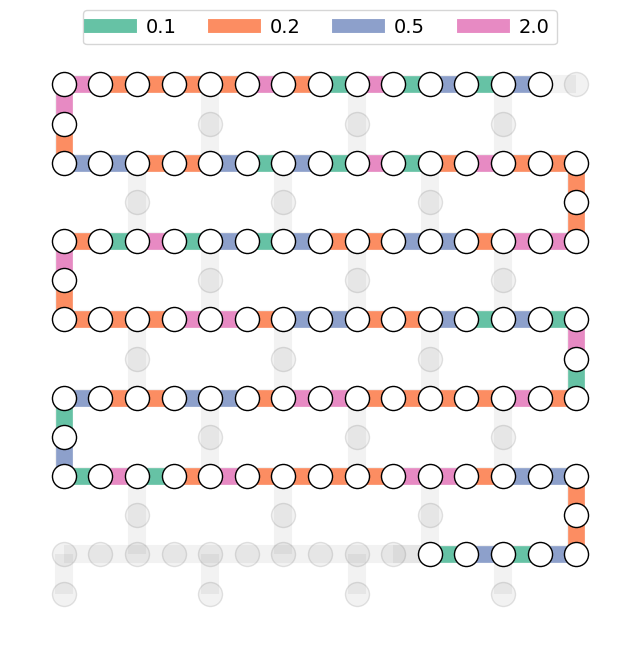

In [36]:
pos = [[i[1],-i[0]] for i in layout_pos.values()]
colors = plt.get_cmap("jet")
nq = 20
G_MaxCut = problems["G"][nq]
color_dict = {0.1:cm_colors(0), 0.2:cm_colors(1), 0.5:cm_colors(2), 2.0:cm_colors(3)}
G = nx.Graph()
G.add_nodes_from(qubits_line[:nq])
G.add_edges_from(layer_1+layer_2)
edge_colors = [color_dict[G_MaxCut[i][j]["weight"]] for i, j in G_MaxCut.edges]

fig, ax = plt.subplots(figsize=(8,8))
# plot_layout_background(ax, alpha=0.2)
plot_layout_background_heron(ax, alpha=0.1)
ax1 = nx.draw(G, pos=pos, ax=ax, font_size=9, edgecolors="black", width=12, edge_color=edge_colors, node_color="white")
for i, color in color_dict.items(): 
    ax.plot([],[], linewidth= 10, color=color, label=i)
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.05), ncols=4)
fig.savefig(f"./Figures/{nq}_qubit_WMaxCut.pdf", bbox_inches="tight", transparent=True)

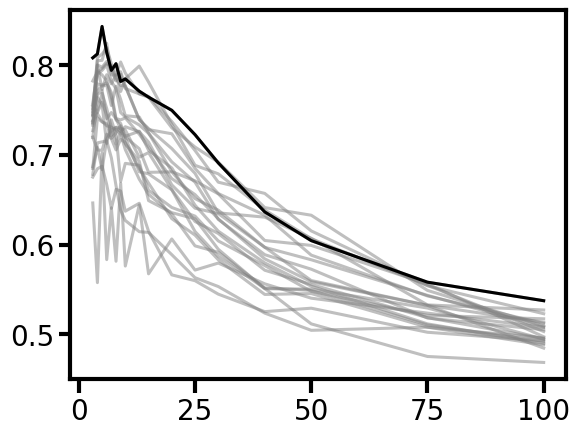

In [100]:
results = np.load("./Data/ibm_brisbane/5_1D.npy", allow_pickle=True).item()
fig, ax = plt.subplots()
best = 0
for i in results["postprocessing"][results["Deltas"][0]][3].keys():
    res_i  = [results["postprocessing"][results["Deltas"][0]][p][i]["r"] for p in results["ps"]]
    ax.plot(results["ps"], res_i, color="gray", alpha=0.5)
    if np.mean(res_i) > best:
        best_result = res_i
        best = np.mean(res_i)
ax.plot(results["ps"], best_result, color="black")
fig.savefig("./Figures/1D/ibm_brisbane_5q1D.pdf", bbox_inches="tight", transparent=True)

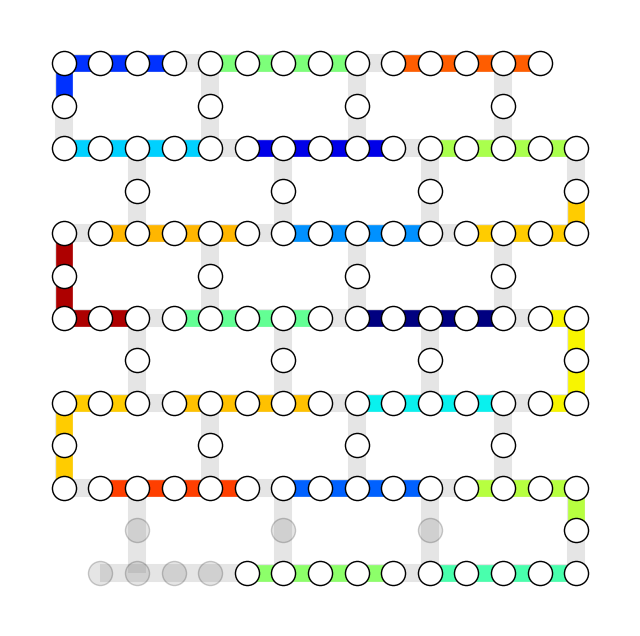

In [23]:
pos = [[i[1],-i[0]] for i in layout_pos.values()]
nq = 5
results = np.load(f"./Data/ibm_brisbane/{nq}_1D.npy", allow_pickle=True).item()

secs =  len(results["postprocessing"][results["Deltas"][0]][3].keys())
colors = plt.get_cmap("jet")

G = nx.Graph()
G.add_nodes_from(range(nq*secs))
maxes = []
for sec in range(secs):
    qubits_sec = qubits_line[sec*nq:(sec + 1)*nq]
    for i in range(nq-1):
        res_i = np.max([results["postprocessing"][results["Deltas"][0]][p][sec]["r"] for p in results["ps"]])
        maxes.append(res_i)
        G.add_weighted_edges_from([[qubits_sec[i], qubits_sec[i+1], res_i]])
vmax = max(maxes)
vmax = 0.85
vmin = min(maxes)
edge_colors = []
for i, j in G.edges:
    edge_colors.append(colors((G[i][j]["weight"]-vmin)/(vmax-vmin)))

fig, ax = plt.subplots(figsize=(8,8))

plot_layout_background(ax, alpha=0.2)
# plot_layout_background_heron(ax, alpha=0.1)
ax1 = nx.draw(G, pos=pos, ax=ax, font_size=9, edgecolors="black", width=12, edge_color=edge_colors, node_color="white")
# fig.savefig(f"./Figures/1D/{nq}_qubit_Best.pdf", bbox_inches="tight", transparent=True)

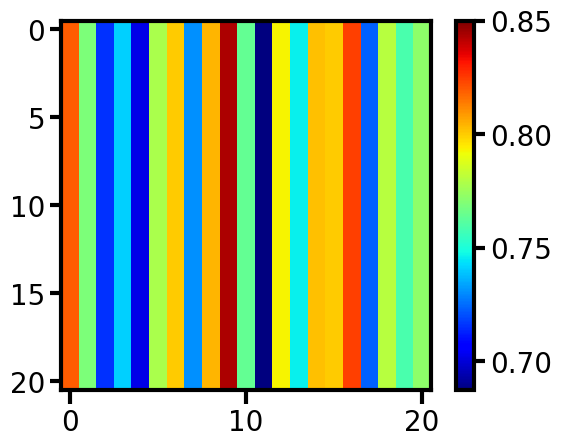

In [109]:
secs =  len(results["postprocessing"][results["Deltas"][0]][3].keys())
matrix = np.zeros((secs,secs))
for i in results["postprocessing"][results["Deltas"][0]][3].keys():
    res_i  = [results["postprocessing"][results["Deltas"][0]][p][i]["r"] for p in results["ps"]]
    matrix[:,i] = secs*[max(res_i)]
fig, ax = plt.subplots()
ax1 = plt.imshow(matrix, cmap="jet", vmax =0.85)
fig.colorbar(ax1, ax=ax)
fig.savefig(f"./Figures/1D/{nq}_qubit_Best_colorbar.pdf", bbox_inches="tight", transparent=True)


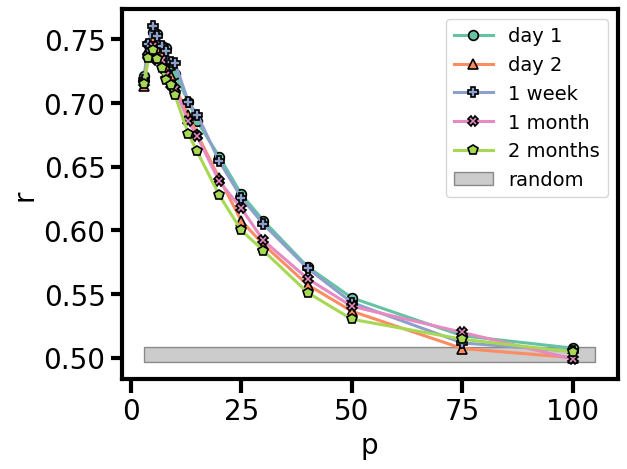

In [31]:
delta = 1
backend_name ="ibm_brisbane"
colors = plt.get_cmap("Set2")
nq = 100
case = ""
fig, ax = plt.subplots()
results = {"day 1": np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item(),
            "day 2": np.load(f"./Data/{backend_name}/{nq}_1D_day2.npy", allow_pickle=True).item(),
            "1 week": np.load(f"./Data/{backend_name}/{nq}_1D_week.npy", allow_pickle=True).item(),
            "1 month": np.load(f"./Data/{backend_name}/{nq}_1D_month.npy", allow_pickle=True).item(),
            "2 months": np.load(f"./Data/{backend_name}/{nq}_1D_2month.npy", allow_pickle=True).item()}

markers = {"day 1":"o", "day 2": "^", "1 week":"P", "1 month": "X", "2 months":"p"}
r_max = []
for nn, name in enumerate(results.keys()):
    res_nq = results[name]["postprocessing"+case]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    r_max.append(rs.max(axis=1))
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = name, marker=markers[name], markeredgecolor="black", color=colors(nn), markersize=7)

rand_data = []
for v, c in zip(results["day 1"]["random"+case]["results"][:,1],results["day 1"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(10):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([3, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")
xx = np.arange(3, 100)
a = 0.434
b = 0.381
c = 0.606
# plt.plot(xx, ((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
ax.legend()
# ax.set_xscale("log")
# fig.savefig(f"./Figures/1D/{backend_name}_differen_days{case}.pdf", bbox_inches="tight", transparent=True)

In [34]:
np.std(r_max)/np.mean(r_max)

0.009260339593255295

In [35]:
np.mean(r_max)

0.7504883076923076

In [39]:
import itertools
len(list(itertools.combinations([0,1,2,3,4], 4)))

5

In [33]:
np.std(r_max)

0.006949776589998238

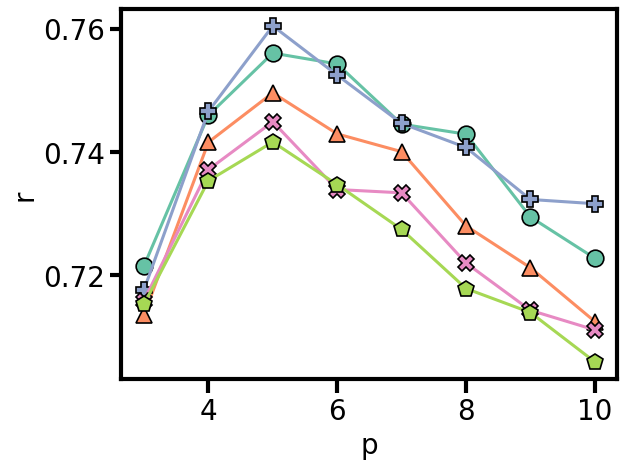

In [362]:
delta = 1
backend_name ="ibm_brisbane"
colors = plt.get_cmap("Set2")
nq = 100
case = ""
fig, ax = plt.subplots()
results = {"day 1": np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item(),
            "day 2": np.load(f"./Data/{backend_name}/{nq}_1D_day2.npy", allow_pickle=True).item(),
            "1 week": np.load(f"./Data/{backend_name}/{nq}_1D_week.npy", allow_pickle=True).item(),
            "1 month": np.load(f"./Data/{backend_name}/{nq}_1D_month.npy", allow_pickle=True).item(),
            "2 months": np.load(f"./Data/{backend_name}/{nq}_1D_2month.npy", allow_pickle=True).item()}

markers = {"day 1":"o", "day 2": "^", "1 week":"P", "1 month": "X", "2 months":"p"}
for nn, name in enumerate(results.keys()):
    res_nq = results[name]["postprocessing"+case]
    ps = list(res_nq[delta].keys())[:8]
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    ax.plot(ps, rs[best_sec], label = name, marker=markers[name], markeredgecolor="black", color=colors(nn), markersize=12)

# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")
xx = np.arange(3, 100)
a = 0.434
b = 0.381
c = 0.606
# plt.plot(xx, ((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
# ax.legend()
# ax.set_xscale("log")
fig.savefig(f"./Figures/1D/{backend_name}_differen_days{case}_zoom.pdf", bbox_inches="tight", transparent=True)

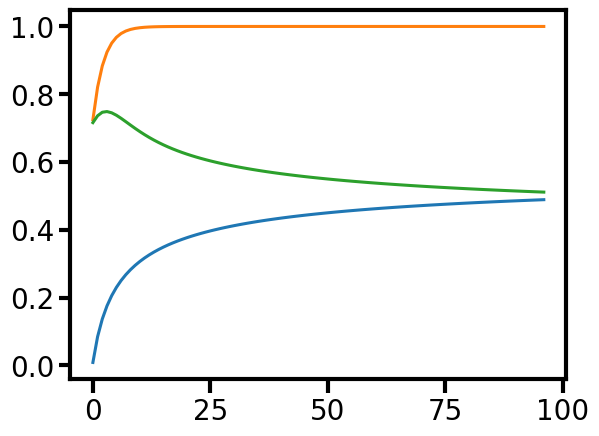

In [194]:
a = 0.43
b = 0.38
c = 0.6
plt.plot(c - (1-b)**np.log(xx))
plt.plot((1 - np.exp(-a*xx)))
# plt.plot((1-Bo)**(xx-3) + (1 - np.exp(-Ao*xx)))
plt.plot(((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
# plt.xscale("log")

In [199]:
data = np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item()


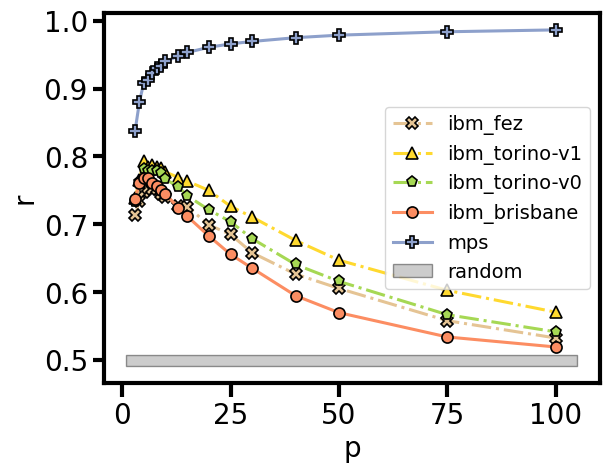

In [387]:
mps = np.load("./Data/mps/60_1D_1.npy", allow_pickle=True).item()
ibm_brisbane = np.load("./Data/ibm_brisbane/60_1D.npy", allow_pickle=True).item()
ibm_torino = np.load("./Data/ibm_torino/60_1D.npy", allow_pickle=True).item()
ibm_torino_v1 = np.load("./Data/ibm_torino/60_1D_udpdate.npy", allow_pickle=True).item()
ibm_fez = np.load("./Data/ibm_fez/60_1D.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
delta = 1
ps = list(mps["postprocessing"][delta].keys())
fig, ax = plt.subplots()
prop = "r"
case = ""
# ax.plot(ps, [hpc[round(delta,2)][p]["postprocessing"]["r"] for p in ps], label ="ideal", marker="o", markeredgecolor="black", markersize=7)
ax.plot(ps, [ibm_fez["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_fez", markeredgecolor="black", markersize=8, color=colors(6), linestyle="-.", marker="X")
ax.plot(ps, [ibm_torino_v1["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_torino-v1", markeredgecolor="black", markersize=8, color=colors(5), linestyle="-.", marker="^")
ax.plot(ps, [ibm_torino["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_torino-v0", markeredgecolor="black", markersize=8, color=colors(4), linestyle="-.", marker="p")
ax.plot(ps, [ibm_brisbane["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_brisbane", markeredgecolor="black", markersize=8, color=colors(1), marker="o")
ax.plot(ps, [mps["postprocessing"+case][delta][p][0][prop] for p in ps], label ="mps", markeredgecolor="black", markersize=8, color=colors(2), marker="P")

rand_data = []
for v, c in zip(ibm_torino["random"+case]["results"][:,1],ibm_torino["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend()
ax.set_xlabel("p")
ax.set_ylabel(prop)
fig.savefig(f"./Figures/1D/{prop}_comparison_mps_60q{case}.pdf", bbox_inches="tight", transparent=True)

In [ ]:
np.load("./Data/ibm_fez/100_1Dp5000b.npy", allow_pickle=True)

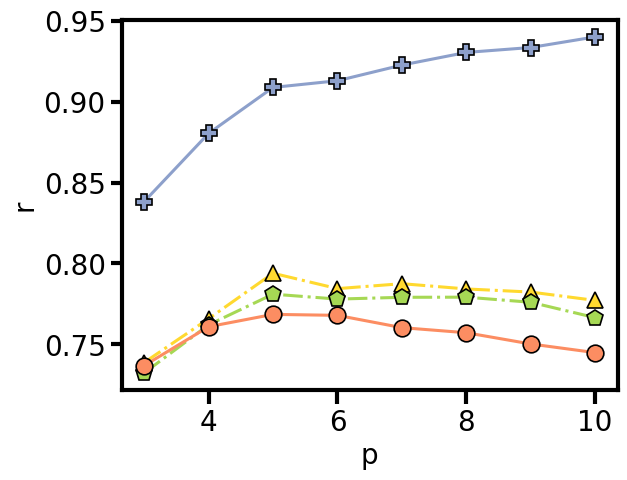

In [391]:
mps = np.load("./Data/mps/60_1D_1.npy", allow_pickle=True).item()
ibm_brisbane = np.load("./Data/ibm_brisbane/60_1D.npy", allow_pickle=True).item()
ibm_torino = np.load("./Data/ibm_torino/60_1D.npy", allow_pickle=True).item()
ibm_torino_v1 = np.load("./Data/ibm_torino/60_1D_udpdate.npy", allow_pickle=True).item()
ibm_fez = np.load("./Data/ibm_fez/60_1D.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
delta = 1
ps = list(mps["postprocessing"][delta].keys())[:8]
fig, ax = plt.subplots()
prop = "r"
case = ""
markersize = 12
# ax.plot(ps, [hpc[round(delta,2)][p]["postprocessing"]["r"] for p in ps], label ="ideal", marker="o", markeredgecolor="black", markersize=7)
# ax.plot(ps, [ibm_fez["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_fez", markeredgecolor="black", markersize=12, color=colors(6), linestyle="-.", marker="X")
ax.plot(ps, [ibm_torino_v1["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_torino-v1", markeredgecolor="black", markersize=markersize, color=colors(5), linestyle="-.", marker="^")
ax.plot(ps, [ibm_torino["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_torino-v0", markeredgecolor="black", markersize=markersize, color=colors(4), linestyle="-.", marker="p")
ax.plot(ps, [ibm_brisbane["postprocessing"+case][1][p][0][prop] for p in ps], label ="ibm_brisbane", markeredgecolor="black", markersize=markersize, color=colors(1), marker="o")
ax.plot(ps, [mps["postprocessing"+case][delta][p][0][prop] for p in ps], label ="mps", markeredgecolor="black", markersize=markersize, color=colors(2), marker="P")

# ax.legend()
ax.set_xlabel("p")
ax.set_ylabel(prop)
fig.savefig(f"./Figures/1D/{prop}_comparison_mps_60q{case}_zoom.pdf", bbox_inches="tight", transparent=True)

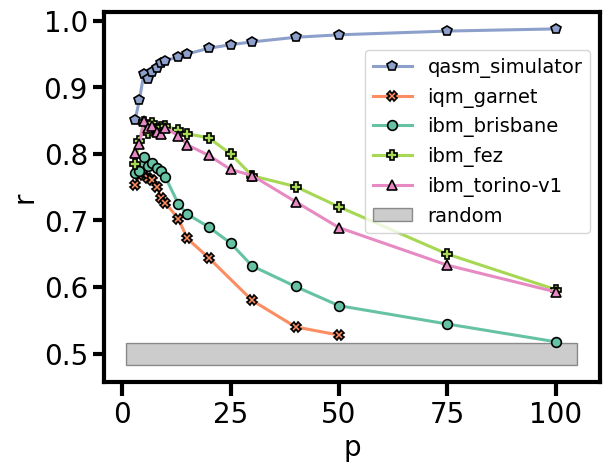

In [386]:
nq = 19
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_brisbane", "ibm_fez"]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
markers = {"ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
color = {"ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.max(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.max(res_i)
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
fig.savefig(f"./Figures/1D/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)

ibm_marrakesh 0.7725692307692306
ibm_fez 0.776613846153846
ibm_torino-v1 0.7602323076923075
ibm_torino-v0 0.7282861538461537
ibm_brisbane 0.7560153846153844
ibm_sherbrooke 0.7209246153846152
ibm_kyiv 0.7232769230769228
ibm_nazca 0.6727430769230768
ibm_kyoto 0.6615830769230767
ibm_osaka 0.6745399999999998
ibm_brussels 0.7191769230769229
ibm_strasbourg 0.7109923076923075


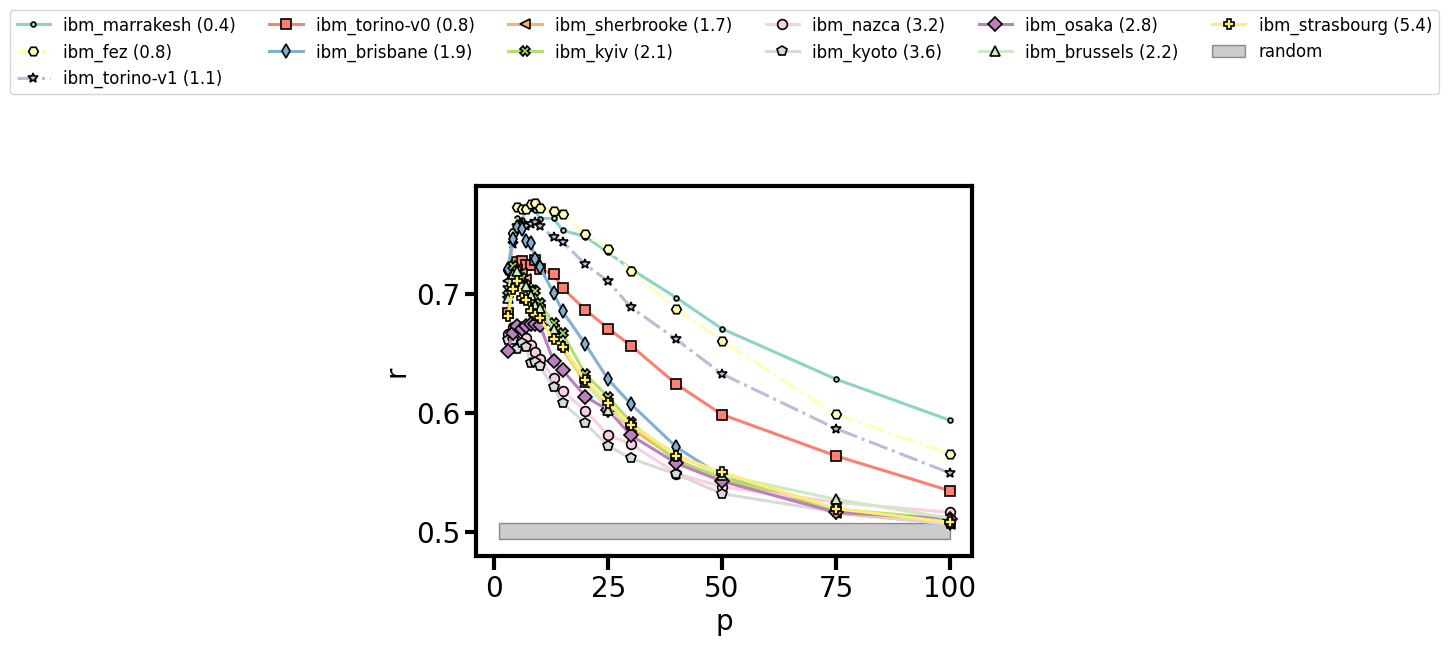

In [7]:
names = ["ibm_marrakesh","ibm_brisbane", "ibm_torino", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_fez", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}
results["ibm_torino-v1"]  = np.load(f"./Data/ibm_torino/100_1D_v1.npy", allow_pickle=True).item()
results["ibm_torino-v0"] = results["ibm_torino"]
fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
names = ["ibm_marrakesh", "ibm_fez", "ibm_torino-v1","ibm_torino-v0", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg"]
colors = plt.get_cmap("Set3")
EPLG = {"ibm_marrakesh":" (0.4)", "ibm_torino-v1":" (1.1)", "ibm_torino-v0":" (0.8)", "ibm_brisbane":" (1.9)", "ibm_sherbrooke":" (1.7)", "ibm_kyiv":" (2.1)", "ibm_osaka":" (2.8)",
         "ibm_nazca":" (3.2)", "ibm_kyoto":" (3.6)", "ibm_kyiv":" (2.1)", "ibm_fez":" (0.8)", "ibm_brussels":" (2.2)", "ibm_strasbourg":" (5.4)"}
markers = {"ibm_marrakesh":".","ibm_torino-v0":"s", "ibm_torino-v1":"*", "ibm_fez":"H", "ibm_brussels":"^", "ibm_brisbane":"d", "ibm_kyoto":"p", "ibm_nazca":"o", "ibm_kyiv":"X", "random":".", "ibm_strasbourg":"P", "H2-1":">", "ibm_sherbrooke":"<", "ibm_osaka":"D"}


for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    if backend_name == "ibm_fez":
        dt = 68e-3
    elif backend_name == "ibm_torino":
        dt = 86e-3
    else:
        dt = 660e-3
    # ax.plot(2*np.array(ps)*dt, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")
    ax.plot(ps, rs, label=backend_name + EPLG[backend_name], markersize=7, markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez", "ibm_torino-v1"] else "-", marker=markers[backend_name])
    print(backend_name, max(rs))
rand_data = res_random["results"][:,1]
rand_mean = []
for i in range(10000):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 100], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([0,100], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.legend(fontsize=11)
ax.set_ylabel("r")
# ax.set_xlabel(r"dt [$\mu s$]")
ax.set_xlabel("p")
# ax.set_xscale("log")
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.5), ncol=6, fontsize=12)

fig.savefig(f"./Figures/1D/comparison_100q_{case}_dt.pdf", bbox_inches="tight", transparent=True)


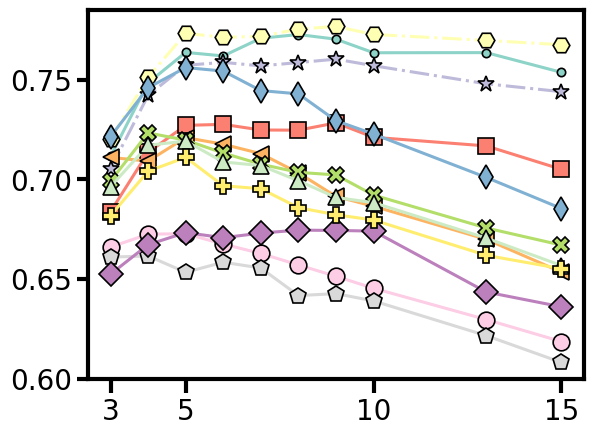

In [12]:
names = ["ibm_marrakesh","ibm_brisbane", "ibm_torino", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_fez", "ibm_brussels", "ibm_strasbourg"]
nq = 100
results = {backend_name:np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item() for backend_name in names}
results["ibm_torino-v1"]  = np.load(f"./Data/ibm_torino/100_1D_v1.npy", allow_pickle=True).item()
results["ibm_torino-v0"] = results["ibm_torino"]
fig, ax = plt.subplots()
delta = 1
nq = 100
kk = 0
case = ""
names = ["ibm_marrakesh","ibm_fez", "ibm_torino-v1","ibm_torino-v0", "ibm_brisbane", "ibm_sherbrooke", "ibm_kyiv", "ibm_nazca", "ibm_kyoto", "ibm_osaka", "ibm_brussels", "ibm_strasbourg"]
colors = plt.get_cmap("Set3")
EPLG = {"ibm_torino-v1":" (1.1)", "ibm_torino-v0":" (0.8)", "ibm_brisbane":" (1.9)", "ibm_sherbrooke":" (1.7)", "ibm_kyiv":" (2.1)", "ibm_osaka":" (2.8)",
         "ibm_nazca":" (3.2)", "ibm_kyoto":" (3.6)", "ibm_kyiv":" (2.1)", "ibm_fez":" (0.8)", "ibm_brussels":" (2.2)", "ibm_strasbourg":" (5.4)"}
markers = {"ibm_marrakesh":".","ibm_torino-v0":"s", "ibm_torino-v1":"*", "ibm_fez":"H", "ibm_brussels":"^", "ibm_brisbane":"d", "ibm_kyoto":"p", "ibm_nazca":"o", "ibm_kyiv":"X", "random":".", "ibm_strasbourg":"P", "H2-1":">", "ibm_sherbrooke":"<", "ibm_osaka":"D"}


for nn, backend_name in enumerate(names):
    res_backend = results[backend_name]["postprocessing"+case]
    if backend_name == "ibm_brisbane":
        res_random = results[backend_name]["random"+case]
    ps = list(res_backend[delta].keys())[:10]
    rs = [res_backend[delta][p][kk]["r"] for p in ps]
    if backend_name == "ibm_fez":
        dt = 68e-3
    elif backend_name == "ibm_torino":
        dt = 86e-3
    else:
        dt = 660e-3
    # ax.plot(2*np.array(ps)*dt, rs, label=backend_name + EPLG[backend_name], marker="o", markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez"] else "-")
    ax.plot(ps, rs, markersize=12, markeredgecolor="black", color=colors(nn), linestyle= "-." if backend_name in ["ibm_torino", "ibm_fez", "ibm_torino-v1"] else "-", marker=markers[backend_name])
ax.set_xticks([3,5,10,15])
fig.savefig(f"./Figures/1D/comparison_100q_{case}_dt_zoom.pdf", bbox_inches="tight", transparent=True)


Best r: 0.728
Best r: 0.76


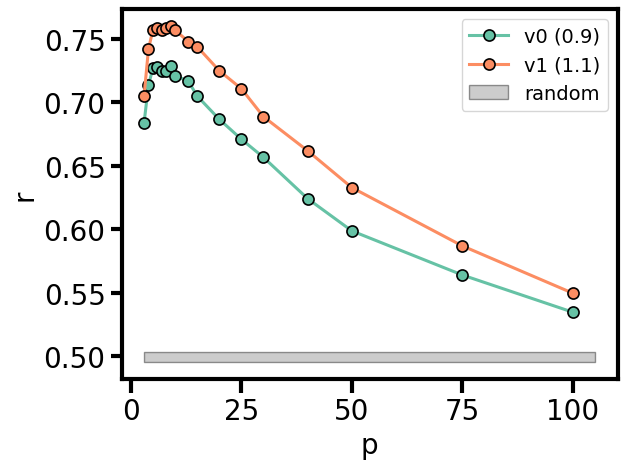

In [264]:
delta = 1
backend_name ="ibm_torino"
colors = plt.get_cmap("Set2")
nq = 100
case = ""
fig, ax = plt.subplots()
results = {"v0 (0.9)": np.load(f"./Data/{backend_name}/{nq}_1D.npy", allow_pickle=True).item(),
            "v1 (1.1)": np.load(f"./Data/{backend_name}/{nq}_1D_udpdate.npy", allow_pickle=True).item()}
for nn, name in enumerate(results.keys()):
    res_nq = results[name]["postprocessing"+case]
    ps = list(res_nq[delta].keys())
    secs = list(res_nq[delta][ps[0]].keys())
    rs = np.array([[res_nq[delta][p][sec]["r"] for p in ps] for sec in secs])
    best_sec = np.argmax(rs.max(axis=1))
    print(f"Best r: {np.round(np.max(rs[best_sec]),3)}")
    ax.plot(ps, rs[best_sec], label = name, marker="o", markeredgecolor="black", color=colors(nn), markersize=8)

rand_data = []
for v, c in zip(results["v1 (1.1)"]["random"+case]["results"][:,1],results["v1 (1.1)"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(10):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([3, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# ax.plot([3, 105], [0.5, 0.5], label="random", color="black", linestyle="--")
ax.set_ylabel("r")
ax.set_xlabel("p")
xx = np.arange(3, 100)
a = 0.434
b = 0.381
c = 0.606
# plt.plot(xx, ((1-b)**np.log(xx) - c) + (1 - np.exp(-a*xx)))
ax.legend()
# ax.set_xscale("log")
fig.savefig(f"./Figures/1D/{backend_name}_versions.pdf", bbox_inches="tight", transparent=True)

In [11]:
ibm_fez["postprocessing"+case][delta][3].keys()

dict_keys([0])

ibm_fez 0.8076692307692307 15


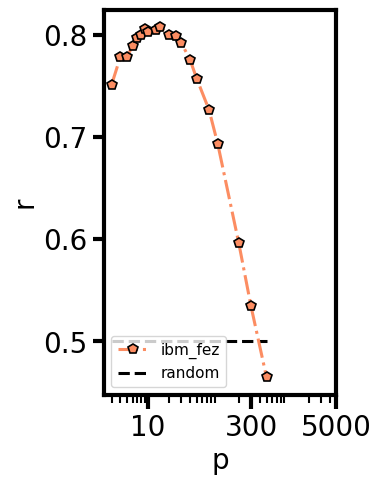

In [20]:
ibm_fez = np.load("./Data/ibm_fez/100_1Dp5000b.npy", allow_pickle=True).item()

color = plt.get_cmap("Set3")
fig, ax = plt.subplots(figsize=(3,5))
ps = ibm_fez["ps"]
# ax.plot(results["ps"][:-2], results["r"][10]["ideal"][:-2], color="black", linewidth=2, linestyle="--", label=r"noiseless")

colors = plt.get_cmap("Set2")
delta = 1
case = ""
prop = "r"

ps = ibm_fez["ps"][:20]
n2q = ps
n2q = np.array([150*i for i in ibm_fez["ps"]])
delta = 0.75
ax.plot(ps, len(ps)*[ibm_fez["random"+case][prop]], linestyle="--", color="black")

ax.plot(ps, [ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps], marker="p", label ="ibm_fez", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.")
# ax.plot(ps, [max(ibm_fez["postprocessing"+case][delta][p][0]["results"][:,1]) for p in ps], marker="p", markeredgecolor="black", markersize=7, color=colors(1), linestyle="-.", alpha=0.3)

print("ibm_fez", max([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps]), ps[np.argmax([ibm_fez["postprocessing"+case][delta][p][0][prop] for p in ps])])

ax.plot([],[], label ="random" ,color="black", linestyle="--")
ax.legend(fontsize=11, loc=3)
ax.set_ylabel("r")
ax.set_xlabel("p")
ax.set_xscale("log")
ax.set_xticks([10,300, 5000])
ax.set_xticklabels([10,300, 5000])

# ax.set_xticks([3, 10, 25, 50, 75, 100])
fig.savefig(f"./Figures/1D/fez_p5000.pdf", bbox_inches="tight", transparent=True)

/var/folders/76/d4kyjysx1xgdrrs6zzs63s180000gn/T/ipykernel_2411/3227949364.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(growth_then_decay, x_data, y_data, p0=initial_guess)


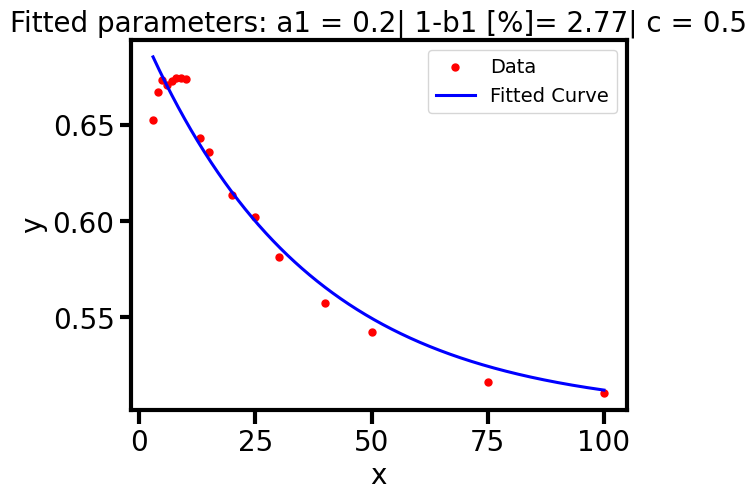

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function that models the behavior: exponential growth followed by exponential decay
def growth_then_decay(x, a, b, c):
    # return (1 - np.exp(-a*x)) - (c - (1-b)**np.log(x))
    return (a*b**(x)) + 0.5

# Generate synthetic data points for fitting (replace with your actual data)
backend_name = "ibm_osaka"
extra = ""
nq = 100
case = "1D"
data = np.load(f"./Data/{backend_name}/{nq}_{case}{extra}.npy", allow_pickle=True).item()
bi = 0
bf = -1
x_data = data["ps"][bi:]
y_data = [data["postprocessing"][1][p][0]["r"] for p in ps][bi:] if case == "1D" else [data["postprocessing"][1][p]["r"] for p in ps][bi:]
# Initial guess for the parameters
initial_guess = [0.1, 0.95, 0.5]

# Fit the curve
params, covariance = curve_fit(growth_then_decay, x_data, y_data, p0=initial_guess)

# Extract the parameters
a1, b1, c = params

# Generate x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = growth_then_decay(x_fit, a1, b1, c)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f"Fitted parameters: a1 = {round(a1,2)}| 1-b1 [%]= {round(100*(1-b1),2)}| c = {round(c,2)}")

# plt.title('Curve Fitting with Exponential Growth and Decay Model')
plt.show()

# Print the fitted parameters


/var/folders/76/d4kyjysx1xgdrrs6zzs63s180000gn/T/ipykernel_2411/948166465.py:22: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(growth_then_decay, x_data, y_data, p0=initial_guess)


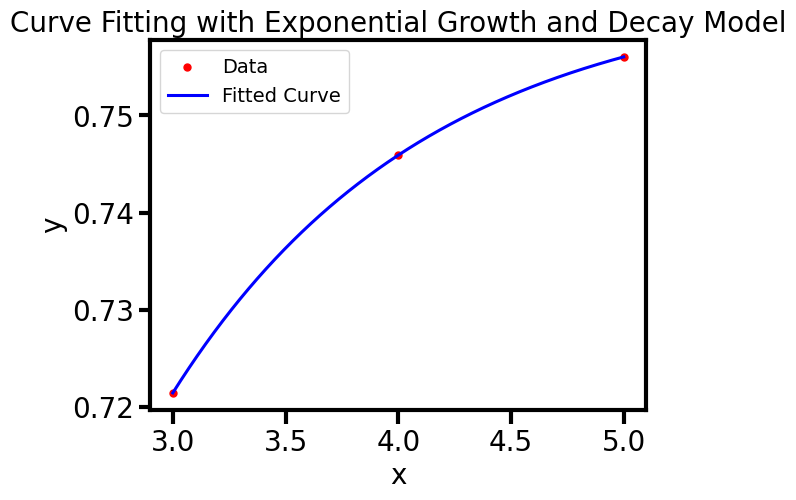

Fitted parameters: a1 = -0.590293161950127, b1 = 0.4134071186014338, c = 0.7631432174429342


In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function that models the behavior: exponential growth followed by exponential decay
def growth_then_decay(x, a, b, c):
    # return (1 - np.exp(-a*x)) - (c - (1-b)**np.log(x))
    return a*(b**x) + c

# Generate synthetic data points for fitting (replace with your actual data)
backend_name = "ibm_brisbane"
nq = 100
case = "1D"
data = np.load(f"./Data/{backend_name}/{nq}_{case}.npy", allow_pickle=True).item()
fi = 3
x_data = data["ps"][:fi]
y_data = [data["postprocessing"][1][p][0]["r"] for p in ps][:fi] if case == "1D" else [data["postprocessing"][1][p]["r"] for p in ps][:fi]
# Initial guess for the parameters
initial_guess = [0.4, 0.4, -0.1]

# Fit the curve
params, covariance = curve_fit(growth_then_decay, x_data, y_data, p0=initial_guess)

# Extract the parameters
a1, b1, c = params

# Generate x values for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = growth_then_decay(x_fit, a1, b1, c)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve Fitting with Exponential Growth and Decay Model')
plt.show()

# Print the fitted parameters
print(f"Fitted parameters: a1 = {a1}, b1 = {b1}, c = {c}")


In [7]:
nq = 19
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_brisbane", "ibm_fez"]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
markers = {"ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set2")
color = {"ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.max(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.max(res_i)
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
fig.savefig(f"./Figures/1D/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: './Data/ibm_torino/5_1D_udpdate.npy'

qasm_simulator 1.0
iqm_garnet 0.7491666666666666
ibm_fez 0.8685
ibm_marrakesh 0.9228333333333334
ibm_brisbane 0.8431666666666666
ankaa_2 0.6076666666666667


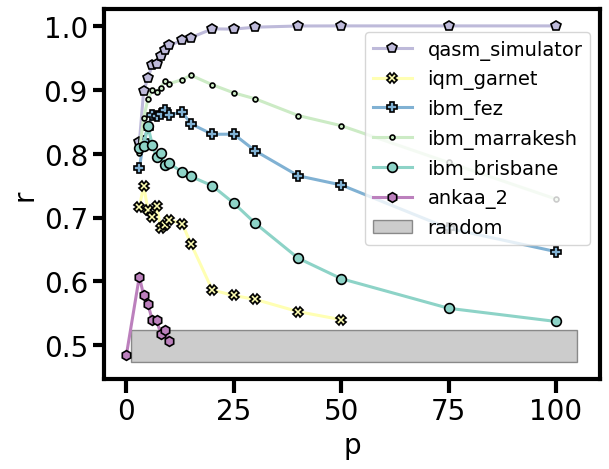

In [42]:
nq = 5
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_fez", "ibm_marrakesh", "ibm_brisbane", "ankaa_2",]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
# results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
markers = {"ibm_marrakesh":".", "ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P", "ankaa_2":"h"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()

colors = plt.get_cmap("Set3")
color = {"ibm_marrakesh":colors(10), "ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4),"ankaa_2":colors(9)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)
    print(name, max(best_sec))
    ax.plot(results[name]["ps"], best_sec, label=name, color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("p")
fig.savefig(f"./Figures/1D/IQM_IBM_comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)

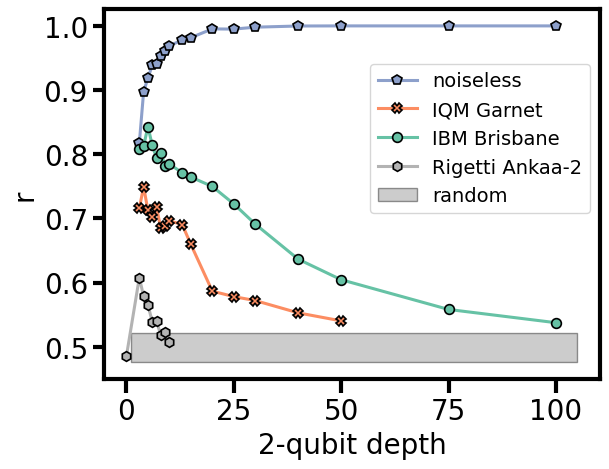

In [24]:
nq = 5
case = ""
prop = "r"
backends = [ "qasm_simulator","iqm_garnet", "ibm_brisbane", "ankaa_2"]
results = {name:np.load(f"./Data/{name}/{nq}_1D.npy", allow_pickle=True).item() for name in backends}
# results["ibm_torino-v1"] = np.load(f"./Data/ibm_torino/{nq}_1D_udpdate.npy", allow_pickle=True).item()
markers = {"ibm_brisbane":"o", "iqm_garnet":"X", "qasm_simulator":"p", "ibm_torino-v1":"^", "ibm_fez":"P", "ankaa_2":"h"}

# ibm_brisbane = np.load(f"./Data/iqm_garnet/{nq}_1D_1.npy", allow_pickle=True).item()
names = {"ibm_brisbane": "IBM Brisbane", "iqm_garnet": "IQM Garnet","ibm_fez":"IBM Fez", "ankaa_2": "Rigetti Ankaa-2", "qasm_simulator":"noiseless"}
colors = plt.get_cmap("Set2")
color = {"ibm_brisbane":colors(0), "iqm_garnet":colors(1), "qasm_simulator":colors(2), "ibm_torino-v1":colors(3), "ibm_fez":colors(4),"ankaa_2":colors(9)}
fig, ax = plt.subplots()
for name in results.keys():
    delta = results[name]["Deltas"][0]
    ps = results[name]["ps"]
    best_mean = 0
    for sec_i in  results[name][f"postprocessing{case}"][delta][ps[0]].keys():
        res_i = [results[name][f"postprocessing{case}"][delta][p][sec_i][prop] for p in ps]
        if np.mean(res_i) > best_mean:
            best_sec = res_i
            best_mean = np.mean(res_i)
    ax.plot([pi for pi in results[name]["ps"]], best_sec, label=names[name], color=color[name], marker=markers[name], markeredgecolor="black", markersize=7)

rand_data = []
for v, c in zip(results["qasm_simulator"]["random"+case]["results"][:,1],results["qasm_simulator"]["random"+case]["results"][:,2]):
    rand_data += int(c) * [v]
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)
    rand_mean.append(np.mean(rand_data[:1000]))
rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.fill_between([1, 105], [y1-y2,y1-y2], [y1+y2,y1+y2], color="gray", alpha=0.4, edgecolor="black", label="random")

ax.legend(loc="center right", bbox_to_anchor=(1,0.65))
ax.set_ylabel(prop)
ax.set_xlabel("2-qubit depth")
fig.savefig(f"./Figures/1D/comparison_{nq}{case}_{prop}.pdf", bbox_inches="tight", transparent=True)